## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [42]:
#1: Loading five datasets
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

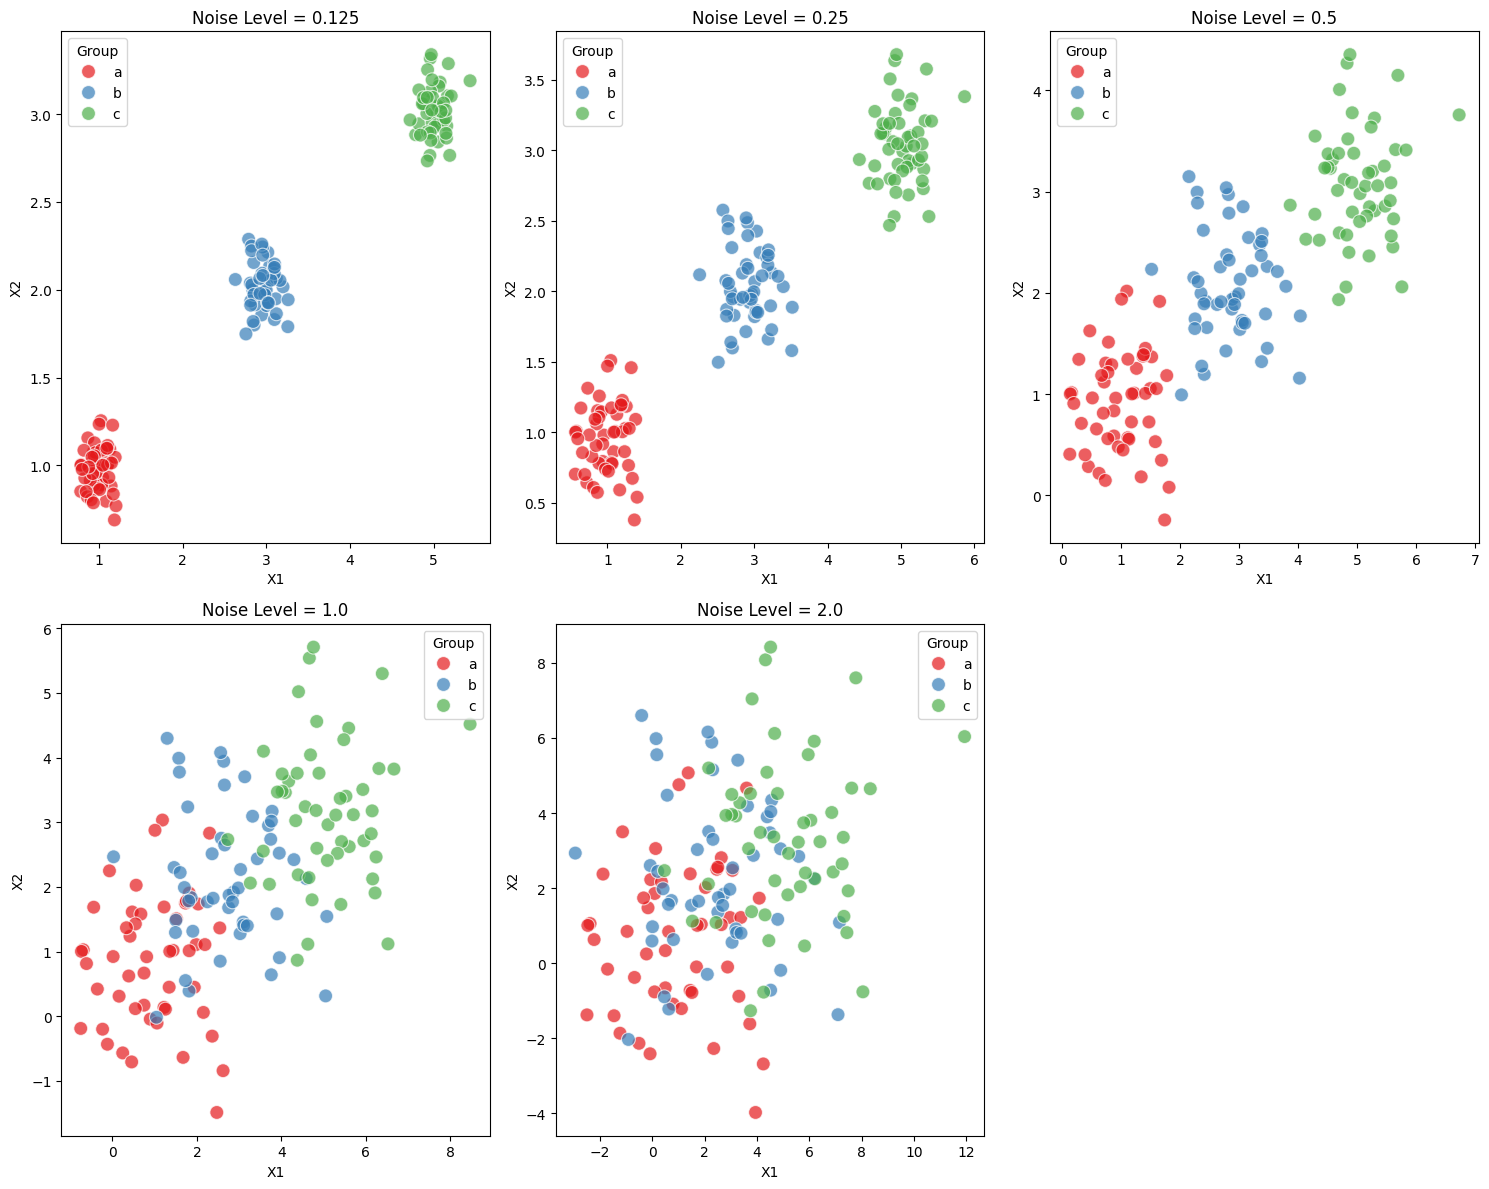

In [30]:
#2: Scatterplots of (X1, X2) points by group for datasets
import matplotlib.pyplot as plt
import seaborn as sns

datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

plt.figure(figsize=(15, 12))

for i in range(len(datasets)):
    df = datasets[i]
    noise = noise_levels[i]
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='Set1', s=100, alpha=0.7)
    plt.title(f"Noise Level = {noise}")
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(title='Group')

plt.tight_layout()
plt.show()

- As the noise level increases from 0.125 to 2.0, the clusters become less visually distinct.

- With low noise, the clusters are well-separated and easily identifiable.

- As the noise increases, the data points spread out more, making the boundaries between clusters less clear and more overlapping.


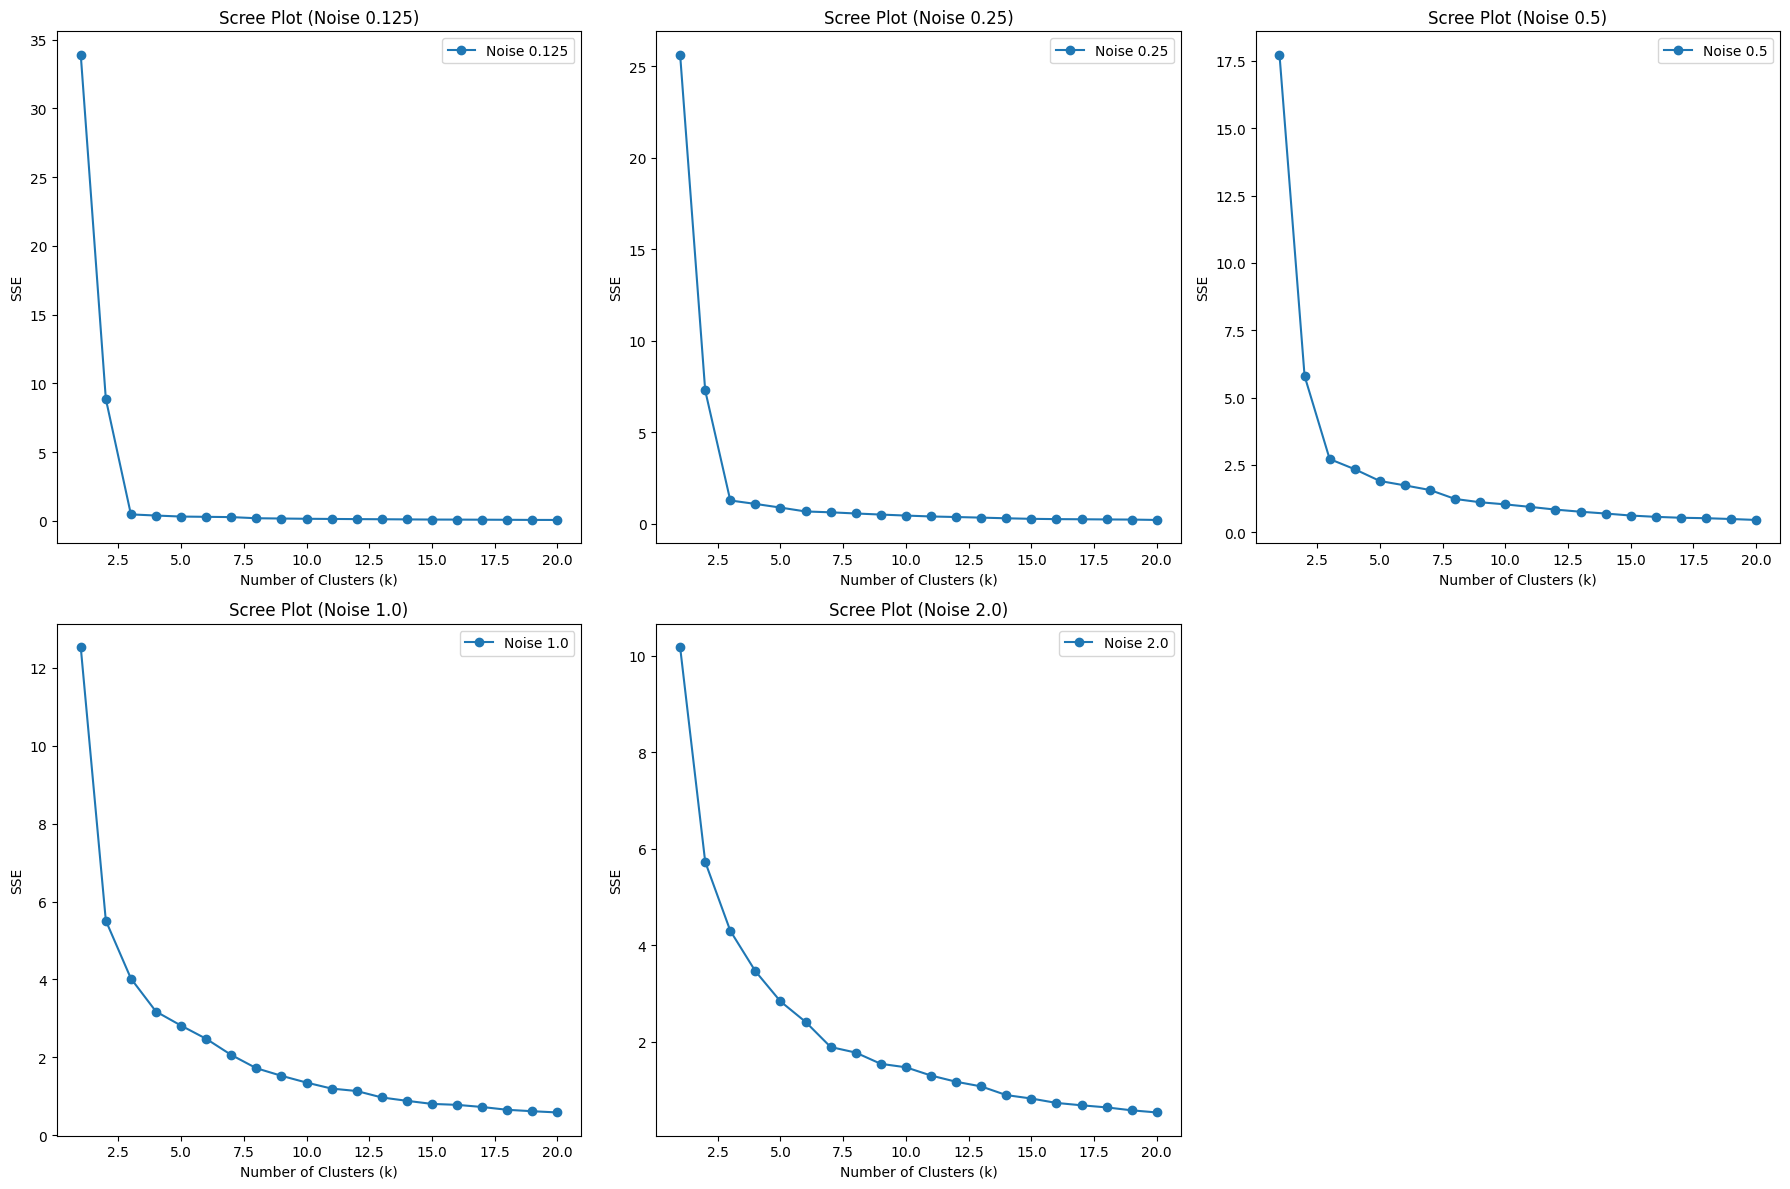

In [41]:
#3: Scree plot for each dataset
from sklearn.cluster import KMeans

def maxmin(x):
    return (x - min(x)) / (max(x) - min(x))

def create_scree_plot(df, ax, noise_level):

    df[['x1', 'x2']] = df[['x1', 'x2']].apply(maxmin)

    k_values = range(1, 21)
    SSE = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(df[['x1', 'x2']])
        SSE.append(kmeans.inertia_)

    ax.plot(k_values, SSE, marker='o', label=f"Noise {noise_level}")
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('SSE')
    ax.set_title(f"Scree Plot (Noise {noise_level})")
    ax.legend()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i in range(5):
    create_scree_plot(datasets[i], axes[i//3, i%3], noise_levels[i])

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

- Lower noise levels (e.g. 0.125 and 0.25) lead to a clear elbow, making it easy to choose k.

- As noise increases (e.g. 0.5 and 1.0), the elbow becomes less pronounced or disappears entirely, making it harder to determine the optimal k.

- Higher noise levels (e.g. 2.0) lead to less distinct elbows, making it more difficult to choose an optimal k value.


4. Explain the intuition of the elbow, using this numerical simulation

- The "elbow" in a scree plot is a point where the rate of decrease in eigenvalues slows down significantly. This point is often used to determine the optimal number of clusters (k) in k-means clustering.  


Explanation of the intuition behind the elbow in a scree plot

- Before the elbow, each additional principal component explains a substantial amount of variance.

- After the elbow, the additional components explain only a small amount of variance, indicating diminishing returns.  

- In summary: The elbow suggests that the components before it capture the essential structure of the data, while those after it represent mostly noise.


Relating the elbow to the numerical simulation in scree plot

- In the simulation, the low-noise datasets show a clear elbow, suggesting that a small number of principal components capture most of the data's structure.  

- The high-noise datasets have less distinct elbows, indicating that more principal components are needed to capture the data's structure, but these additional components also capture more noise. This makes choosing k more challenging.

- In summary:  The elbow represents the point where adding more principal components provides diminishing returns in explained variance. In the simulation, high noise obscures the elbow, making k selection difficult.




**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [1]:
#1: Loading dataset
import pandas as pd

df = pd.read_csv('airbnb_hw.csv')
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [2]:
#Cleaning Price, Beds, Number of Reviews, and Review Scores Rating.
df_cleaned = df[['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']]

df_cleaned = df_cleaned.dropna()

df_cleaned.head(5)

,Price,Beds,Number Of Reviews,Review Scores Rating
4,549,3.0,39,96.0
5,149,1.0,4,100.0
6,250,1.0,9,100.0
7,90,1.0,80,94.0
8,270,2.0,95,90.0


In [3]:
#2: Maxmin normalize dataset
def maxmin(x):
    x = x.dropna()
    return (x - min(x)) / (max(x) - min(x))

columns_to_normalize = ['Beds', 'Number Of Reviews', 'Review Scores Rating']

df_normalized = df_cleaned.copy()
df_normalized[columns_to_normalize] = df_cleaned[columns_to_normalize].apply(maxmin)

df_normalized.head(5)

,Price,Beds,Number Of Reviews,Review Scores Rating
4,549,0.1875,0.148438,0.950
5,149,0.0625,0.011719,1.000
6,250,0.0625,0.031250,1.000
7,90,0.0625,0.308594,0.925
8,270,0.1250,0.367188,0.875


In [4]:
#3: Clustering data by Beds, Number of Reviews, and Review Scores Rating for k=6
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
df_normalized['Cluster'] = kmeans.fit_predict(df_normalized[columns_to_normalize])

df_normalized['Cluster'].value_counts()

,count
Cluster,
3,8592
0,6322
1,3084
2,2876
4,830
5,407


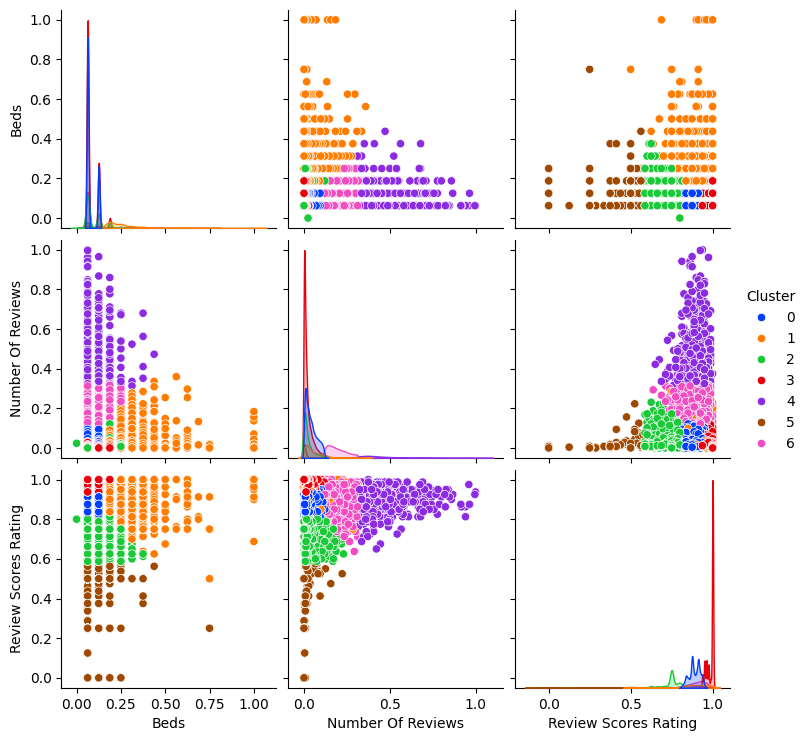

In [44]:
#4: Grid of scatterplots with different colors for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_normalized, hue='Cluster', palette='bright', vars=columns_to_normalize)
plt.show()

In [11]:
#5: Compute the average price (mean) for each cluster
df_cleaned['Price'] = pd.to_numeric(df_cleaned['Price'], errors='coerce')

df_normalized['Price'] = df_cleaned['Price'].values

df_normalized.groupby('Cluster')['Price'].mean()

,Price
Cluster,
0,144.965326
1,158.456203
2,141.263488
3,159.000584
4,132.362651
5,117.536946


In [12]:
#Descriptions of each cluster by rental price
df_normalized.groupby('Cluster')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,6316.0,144.965326,90.356037,24.0,85.0,125.0,180.0,999.0
1,3071.0,158.456203,109.125215,22.0,90.0,130.0,190.0,975.0
2,2873.0,141.263488,99.788075,20.0,75.0,116.0,179.0,995.0
3,8564.0,159.000584,105.104135,10.0,89.0,135.0,200.0,997.0
4,830.0,132.362651,82.023488,27.0,80.0,110.0,165.0,875.0
5,406.0,117.536946,83.145788,25.0,60.0,89.5,150.0,499.0


Based on the description table, cluster 3 has the highest average price, followed by cluster 1 and cluster 0.

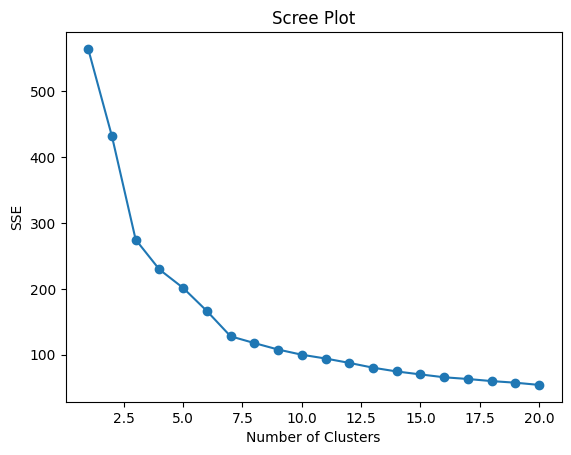

In [45]:
#6: Scree plot to pick number of clusters
k_values = range(1, 21)
SSE = []

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_normalized[columns_to_normalize])
  SSE.append(kmeans.inertia_)

# Plot the scree plot
plt.plot(k_values, SSE, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

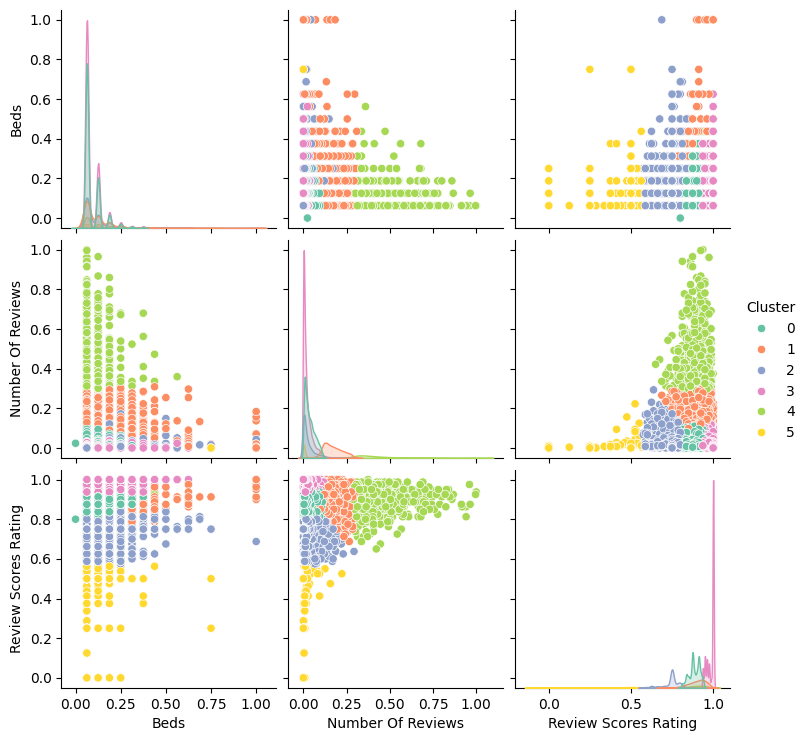

In [16]:
#Grid of scatterplots with different colors for new clusters (repeating step 4)
sns.pairplot(df_normalized, hue='Cluster', palette='Set2', vars=columns_to_normalize)
plt.show()

In [24]:
#Compute the average price (mean) for new clusters (repeating step 5)
optimal_k = 7

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
df_normalized['Cluster'] = kmeans_optimal.fit_predict(df_normalized[columns_to_normalize])

df_normalized.groupby('Cluster')['Price'].mean()

,Price
Cluster,
0,136.192049
1,271.321517
2,130.665948
3,151.711771
4,132.645897
5,118.014706
6,139.057288


In [20]:
#Description of new clusters by rental price
df_normalized.groupby('Cluster')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,6087.0,136.192049,76.319475,24.0,80.0,120.0,175.0,999.0
1,1608.0,271.321517,167.607998,27.0,150.0,225.0,350.0,997.0
2,2781.0,130.665948,85.350856,20.0,70.0,109.0,165.0,899.0
3,7952.0,151.711771,93.644677,10.0,85.0,130.0,195.0,985.0
4,658.0,132.645897,77.895732,29.0,80.0,110.0,165.0,649.0
5,408.0,118.014706,83.327009,25.0,60.0,90.0,150.0,499.0
6,2566.0,139.057288,82.522820,22.0,85.0,120.0,175.0,895.0


**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?